# DS 3000 - DS Practicum 3

**Student Name**: Tin Wan Jared Tung, Carlie Chin, Michael Danzi, Elizabeth Niemiec

**Date**: 4-7-2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

In your own words, formulate the Data Science problem.

This data science project aims to develop a predictive model that is able to classify individuals into one of the three categories; diabetic, pre-diabetic or non-diabetic. We retrieve various aspects of health, including BMI, physical activity, smoking status, feelings of general health, as well as their demographic and behavioral counterparts through the use of CDC Diabetes Health Indicators based on the Behavioral Risk Factor Surveillance System (BRFSS) data. The problem is multi-class classification and its goal is the discovery of relationships and patterns between these health indicators and the diabetes outcomes. Developing an accurate and reliable machine learning model is the basis to provide inputs to key diabetes risk factors, and for early identification of diabetes risk individuals. The solution can ultimately provide guidance to public health strategies and assist in preventative healthcare programming mechanisms by providing a more specific and data driven intervention.

## Question 2: 

- Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis. 

In [50]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [51]:
# Step 1: Define column types
binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]

ordinal_cols = ['GenHlth', 'Education', 'Income']  # Ordinal scales
target_col = 'Diabetes_012'  # Multi-class target: 0 = no diabetes, 1 = pre-diabetic, 2 = diabetic

# Convert to category type
df[binary_cols + ordinal_cols + [target_col]] = df[binary_cols + ordinal_cols + [target_col]].astype('category')

# Step 3: Determine missing values
print('Missing values:\n', df.isna().sum())

Missing values:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [52]:
# Step 4: Handle outliers in continuous columns
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Remove outliers from continuous variables
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)
    
df.describe()

,BMI,MentHlth,PhysHlth,Age
count,182522.000000,182522.000000,182522.000000,182522.000000
mean,27.335817,0.493760,0.534686,8.036439
std,4.787937,1.208057,1.211728,3.070680
min,14.000000,0.000000,0.000000,1.000000
25%,24.000000,0.000000,0.000000,6.000000
50%,27.000000,0.000000,0.000000,8.000000
75%,30.000000,0.000000,0.000000,10.000000
max,41.000000,5.000000,5.000000,13.000000


Question 2 was started by data evaluation to make sure each variable has the right data type for machine learning modeling. HighBP, Smoker and Sex were converted typically to the category data type to indicate a categorical variable and makes the code run faster. Categorical variables were also treated as ordinal like GenHlth, Education, Income which have a meaningful ranked order. Similarly, Diabetes_012, which is the column for no diabetes, pre-diabetes, and diabetes was made a categorical variable with values for multi class classification.

Finally we checked for data integrity by verifying that there were no missing values present in the dataset as indicated in data dictionary and programmatically, the dataset had no null entries. We also examined the contents of each column to be sure that there was no such thing as -1 or a 99 for example. We had dealt with potential outliers on for continuous variables such as BMI, MentHlth, PhysHlth, and Age, by the Interquartile Range (IQR) method. It helped removing extreme values that can skew the model training and bad generalization. With these steps the dataset was clean, consistent, and formatted properly to be used in effective exploratory analysis and machine learning development.

## Question 3:

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results. This is a 20pt question and requires detailed analyses and visualizations.

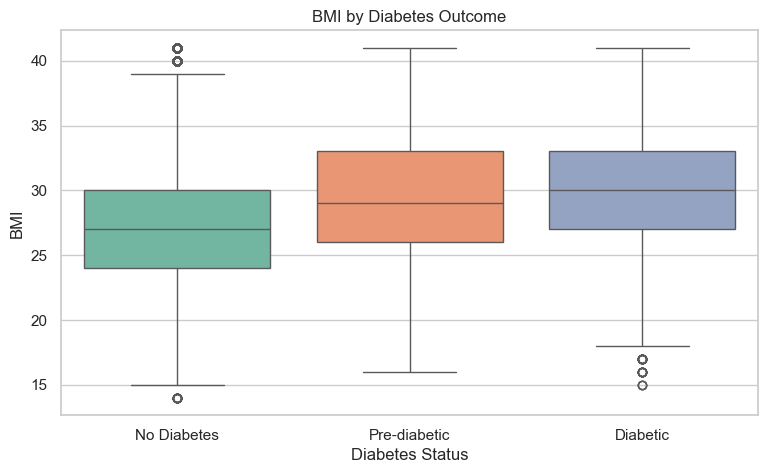

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9, 5)

# Create readable diabetes class labels if not already done
diabetes_labels = {0: 'No Diabetes', 1: 'Pre-diabetic', 2: 'Diabetic'}
df['Diabetes_Label'] = df['Diabetes_012'].map(diabetes_labels)

# ----------------------------
# 1. AGE vs DIABETES (Boxplot)
# ----------------------------
sns.boxplot(data=df, x='Diabetes_Label', y='BMI', hue='Diabetes_Label', palette='Set2', dodge=False)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.legend([],[], frameon=False)
plt.show()

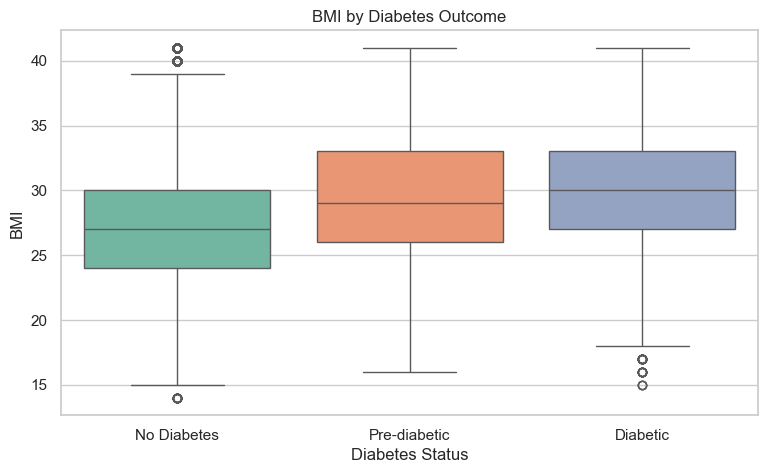

In [54]:
# ----------------------------
# 2. BMI vs DIABETES
# ----------------------------
sns.boxplot(data=df, x='Diabetes_Label', y='BMI', hue='Diabetes_Label', palette='Set2', dodge=False)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.legend([],[], frameon=False)
plt.show()

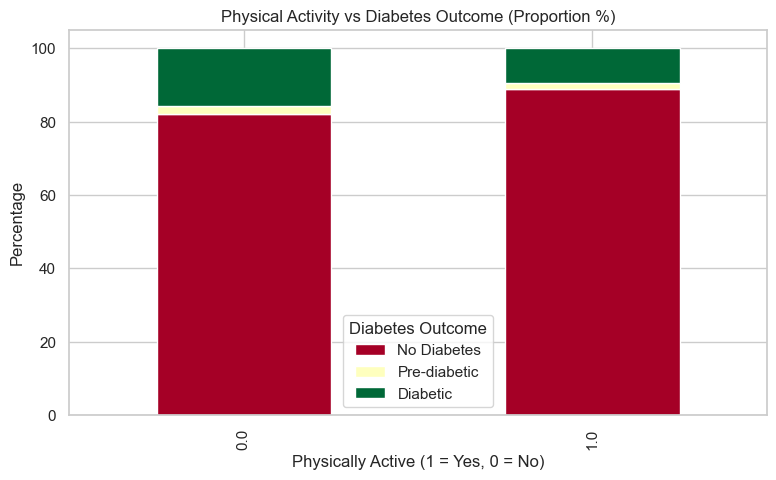

In [55]:
# ----------------------------
# 3. PHYSICAL ACTIVITY vs DIABETES (Stacked % Bar)
# ----------------------------
phys_df = pd.crosstab(df['PhysActivity'], df['Diabetes_Label'], normalize='index') * 100
phys_df.plot(kind='bar', stacked=True, colormap='RdYlGn')
plt.title('Physical Activity vs Diabetes Outcome (Proportion %)')
plt.xlabel('Physically Active (1 = Yes, 0 = No)')
plt.ylabel('Percentage')
plt.legend(title='Diabetes Outcome')
plt.show()

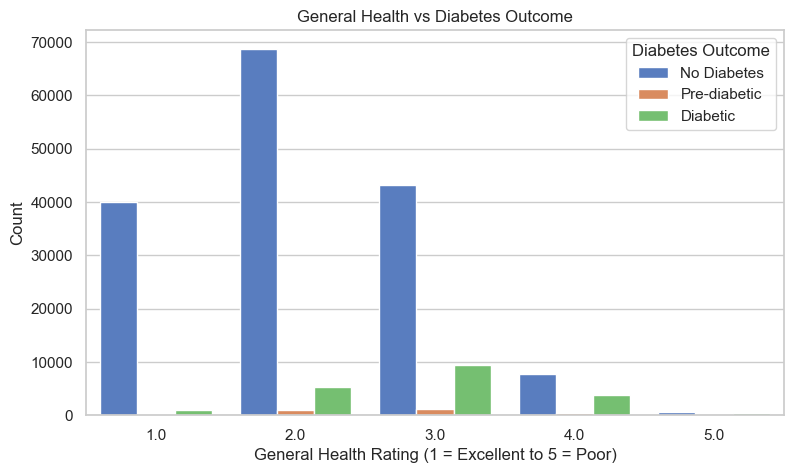

In [56]:
# ----------------------------
# 4. GENERAL HEALTH vs DIABETES
# ----------------------------
sns.countplot(data=df, x='GenHlth', hue='Diabetes_Label', palette='muted')
plt.title('General Health vs Diabetes Outcome')
plt.xlabel('General Health Rating (1 = Excellent to 5 = Poor)')
plt.ylabel('Count')
plt.legend(title='Diabetes Outcome')
plt.show()

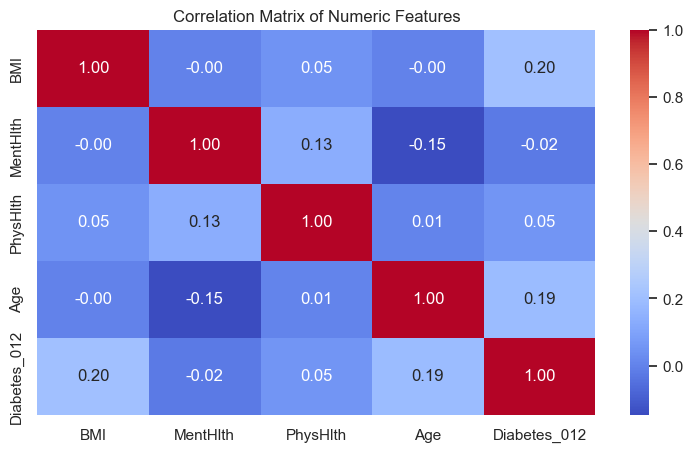

In [57]:

# ----------------------------
# 5. CORRELATION HEATMAP (numeric only)
# ----------------------------
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Diabetes_012']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


### 1. Age Distribution by Diabetes Outcome (Boxplot)
Age boxplot has a clear and meaningful trend across the three classes of diabetes. The average age of pre diabetic individuals is between diabetics who are significantly older. Median age increases steadily over the left to right; spread (interquartile range) is also positively correlated to the left to right. This serves as an affirmation that diabetes is a serious age-related risk factor, which as we know in accordance with general mediloinal knowledge, the more time one spends under stressful lifestyle conditions or metabolic stress, the more likely he or she is to become insulin resistant and develop diabetes.

### 2. BMI by Diabetes Outcome (Boxplot)
The box plot of BMI shows that there is strong association of higher BMI with diabetes status. Those with pre diabetes have much higher BMI than non-diabetics and those with diabetes have even higher BMI. The diabetic group has a hypertension, with a narrower interquartile range indicating that obesity in diabetics is both common and consistent. Clinical evidence in support is that excess body fat is one of the strongest predictors of diabetes, particularly Type 2, which is driven by insulin resistance.

### 3. Physical Activity vs. Diabetes Outcome (Stacked Percentage Bar Chart)
The bars are stacked to show the proportion of diabetes classes in each physical activity group. Those who are physically inactive have a higher diabetic status than those who practice regular physical activities. This, conversely, represents a very large share of non diabetics for individuals who are active. Physical activity is a protective factor for both pre-diabetes and diabetes since it reduced the risk. This provides stark contrast in class proportions which advocates a lifestyle intervention for prevention.

### 4. General Health Rating vs. Diabetes Outcome (Grouped Bar Chart)
A strong inverse relationship between self-reported general health and whether or not a person has diabetes can be seen in this chart. Individuals who give a poor rating to their health (5) are much more prone to be diabetic while those who have excellent judgment (1) are almost all non-diabetic. Middle categories cluster pre diabetics. These results imply that perceived health status can predict actual metabolic status well and thus be used as a good variable for early screening or risk profile.

### 5. Correlation Matrix (Heatmap of Numeric Features)
The correlation heatmap offers a quantification of numeric features with respect to their diabetic status. Age and BMI are the variables with the strongest positive correlations to the diabetes outcome, as is expected. In addition, PhysHlth and MentHlth have moderate positive correlation, which suggests the general decrease in health of diabetics. The correlations aren’t that high, since the problem is multi class and categorical, but they do a good job of guiding feature selection by showing you variables with which there are meaningful statistical relationships.




## Question 4a:

- Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.

- Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.

Note: if you are using correlations, ensure that this is only performed using continuous variables.

In [58]:
from scipy.stats import stats
from scipy.stats import chi2_contingency

In [59]:
# ----------------------------
# 1. AGE vs DIABETES
# ----------------------------
# USE ANOVA (bc > 2 factors)

diabetes_data = df.groupby('Diabetes_Label')

age_no_diabetes = diabetes_data.get_group('No Diabetes')['Age']
age_pre_diabetic = diabetes_data.get_group('Pre-diabetic')['Age']
age_diabetic = diabetes_data.get_group('Diabetic')['Age']

stats_age = stats.f_oneway(age_no_diabetes, age_pre_diabetic, age_diabetic)
print('F-statistic:', round(stats_age[0], 2))
print('p-value:', round(stats_age[1], 2))
if stats_age[1] < 0.05:
    print('The ANOVA test results between diabetes conditions when grouped by age ARE statistically significant.')
else:
    print('The ANOVA test results between diabetes conditions when grouped by age ARE NOT statistically significant.')

F-statistic: 3398.8
p-value: 0.0
The ANOVA test results between diabetes conditions when grouped by age ARE statistically significant.


/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/696892588.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_data = df.groupby('Diabetes_Label')
/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/696892588.py:12: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  stats_age = stats.f_oneway(age_no_diabetes, age_pre_diabetic, age_diabetic)


#### Statistically significant:
Our F-statistic is really high (more likely that at least one group mean is significantly different than others)
Our p-value = 0, which is < 0.05. There is strong evidence against the null hypothesis, so we can reject it. The differences between diabetes conditions when grouped by age are statistically significant. These are likely not due to chance, and could be due to changes in risk factors that occur as we age.

In [60]:
# ----------------------------
# 1a. AGE vs DIABETES (pairwise t-tests)
# ----------------------------
t_stat_1, p_value_1 = stats.ttest_ind(age_no_diabetes, age_pre_diabetic)
t_stat_2, p_value_2 = stats.ttest_ind(age_no_diabetes, age_diabetic)
t_stat_3, p_value_3 = stats.ttest_ind(age_pre_diabetic, age_diabetic)

print(f'No Diabetes and Pre-diabetic: t-statistic = {round(t_stat_1, 2)}, p-value = {round(p_value_1, 2)}')
if p_value_1 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')
    
print(f'No Diabetes and Diabetic: t-statistic = {round(t_stat_2, 2)}, p-value = {round(p_value_2, 2)}')
if p_value_2 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')
    
print(f'Pre-diabetic and Diabetic: t-statistic = {round(t_stat_3, 2)}, p-value = {round(p_value_3, 2)}')
if p_value_3 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')

No Diabetes and Pre-diabetic: t-statistic = -27.05, p-value = 0.0
Statistically significant!

No Diabetes and Diabetic: t-statistic = -78.6, p-value = 0.0
Statistically significant!

Pre-diabetic and Diabetic: t-statistic = -4.33, p-value = 0.0
Statistically significant!



/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/563831167.py:4: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_1, p_value_1 = stats.ttest_ind(age_no_diabetes, age_pre_diabetic)
/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/563831167.py:5: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_2, p_value_2 = stats.ttest_ind(age_no_diabetes, age_diabetic)
/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/563831167.py:6: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_3, p_value_3 = stats.ttest_ind(age_pre_diabetic, age_diabetic)


These results reaffirm that the differences between each individual diabetic condition when grouped by age are statistically significant.

In [61]:
# ----------------------------
# 2. BMI vs DIABETES
# ----------------------------
# USE ANOVA (bc > 2 factors)

BMI_no_diabetes = diabetes_data.get_group('No Diabetes')['BMI']
BMI_pre_diabetic = diabetes_data.get_group('Pre-diabetic')['BMI']
BMI_diabetic = diabetes_data.get_group('Diabetic')['BMI']

stats_bmi = stats.f_oneway(BMI_no_diabetes, BMI_pre_diabetic, BMI_diabetic)

print('F-statistic:', round(stats_bmi[0], 2))
print('p-value:', round(stats_bmi[1], 2))
if stats_bmi[1] < 0.05:
    print('The ANOVA test results between diabetes conditions when grouped by BMI ARE statistically significant.')
else:
    print('The ANOVA test results between diabetes conditions when grouped by BMI ARE NOT statistically significant.')

F-statistic: 3993.9
p-value: 0.0
The ANOVA test results between diabetes conditions when grouped by BMI ARE statistically significant.


/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/4159789450.py:10: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  stats_bmi = stats.f_oneway(BMI_no_diabetes, BMI_pre_diabetic, BMI_diabetic)


#### Statistically significant:
Our F-statistic is really high (more likely that at least one group mean is significantly different than others). Our p-value = 0, which is < 0.05. There is strong evidence against the null hypothesis, so we can reject it. The differences between diabetes conditions when grouped by BMI are statistically significant. These are likely not due to chance, and could be due to changes in risk factors that occur as BMI changes.

In [62]:
# ----------------------------
# 2a. BMI vs DIABETES (pairwise t-tests)
# ----------------------------
t_stat_1, p_value_1 = stats.ttest_ind(BMI_no_diabetes, BMI_pre_diabetic)
t_stat_2, p_value_2 = stats.ttest_ind(BMI_no_diabetes, BMI_diabetic)
t_stat_3, p_value_3 = stats.ttest_ind(BMI_pre_diabetic, BMI_diabetic)

print('"No Diabetes and Pre-diabetic: t-statistic = {round(t_stat_1, 2)}, p-value = {round(p_value_1, 2)}')
if p_value_1 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')
    
print(f'No Diabetes and Diabetic: t-statistic = {round(t_stat_2, 2)}, p-value = {round(p_value_2, 2)}')
if p_value_2 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')
    
print(f'Pre-diabetic and Diabetic: t-statistic = {round(t_stat_3, 2)}, p-value = {round(p_value_3, 2)}')
if p_value_3 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')

"No Diabetes and Pre-diabetic: t-statistic = {round(t_stat_1, 2)}, p-value = {round(p_value_1, 2)}
Statistically significant!

No Diabetes and Diabetic: t-statistic = -86.27, p-value = 0.0
Statistically significant!

Pre-diabetic and Diabetic: t-statistic = -6.18, p-value = 0.0
Statistically significant!



/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/1381010251.py:4: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_1, p_value_1 = stats.ttest_ind(BMI_no_diabetes, BMI_pre_diabetic)
/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/1381010251.py:5: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_2, p_value_2 = stats.ttest_ind(BMI_no_diabetes, BMI_diabetic)
/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/1381010251.py:6: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_3, p_value_3 = stats.ttest_ind(BMI_pre_diabetic, BMI_diabetic)


These results reaffirm that the differences between each individual diabetic condition when grouped by BMI are statistically significant.

In [63]:
# ----------------------------
# 3. PHYSICAL ACTIVITY vs DIABETES
# ----------------------------
# CHI-SQUARE (both variables are categorical)

phys_contingency_table = pd.crosstab(df['Diabetes_Label'], df['PhysActivity'])

phys_chi2_stat, phys_p_value, phys_dof, phys_expected = chi2_contingency(phys_contingency_table)

print('Chi-square Statistic:', round(phys_chi2_stat, 2))
print('p-value:', round(phys_p_value, 2))

if phys_p_value < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')

Chi-square Statistic: 1268.9
p-value: 0.0
Statistically significant!



#### Statistically significant:
Our Chi-square statistic is really high (more likely that at least one group mean is significantly different than others). Our p-value = 0, which is < 0.05. There is strong evidence against the null hypothesis, so we can reject it. The relationship between diabetes conditions and activity level is statistically significant. Observed differences are likely not due to chance, and could be due to changes in risk factors that occur as physical activity level changes.

In [64]:
# ----------------------------
# 4.GENERAL HEALTH vs DIABETES
# ----------------------------
# CHI-SQUARE (categorical)

gen_contingency_table = pd.crosstab(df['Diabetes_Label'], df['GenHlth'])

gen_chi2_stat, gen_p_value, gen_dof, gen_expected = chi2_contingency(gen_contingency_table)

print('Chi-square Statistic:', round(gen_chi2_stat, 2))
print('p-value:', round(gen_p_value, 2))

if gen_p_value < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')

Chi-square Statistic: 13664.01
p-value: 0.0
Statistically significant!



#### Statistically significant:
Our Chi-square statistic is really high (more likely that at least one group mean is significantly different than others). Our p-value = 0, which is < 0.05. There is strong evidence against the null hypothesis, so we can reject it. The relationship between diabetes conditions and general health is statistically significant. Observed differences are likely not due to chance, and could be due to changes in risk factors that occur as general health level changes.

In [65]:
# ----------------------------
# 5. MENTAL HEALTH vs DIABETES
# ----------------------------
# ANOVA (bc > 2 factors)

ment_no_diabetes = diabetes_data.get_group('No Diabetes')['MentHlth']
ment_pre_diabetic = diabetes_data.get_group('Pre-diabetic')['MentHlth']
ment_diabetic = diabetes_data.get_group('Diabetic')['MentHlth']

stats_menthlth = stats.f_oneway(ment_no_diabetes, ment_pre_diabetic, ment_diabetic)

print('F-statistic:', round(stats_menthlth[0], 2))
print('p-value:', round(stats_menthlth[1], 2))
if stats_menthlth[1] < 0.05:
    print('The ANOVA test results between diabetes conditions when grouped by mental health level ARE statistically significant.')
else:
    print('The ANOVA test results between diabetes conditions when grouped by mental health level ARE NOT statistically significant.')

# also still technically statistically significant, but less so than other factors/ patterns

F-statistic: 46.59
p-value: 0.0
The ANOVA test results between diabetes conditions when grouped by mental health level ARE statistically significant.


/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/1118065191.py:10: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  stats_menthlth = stats.f_oneway(ment_no_diabetes, ment_pre_diabetic, ment_diabetic)


#### Statistically significant:
Our p-value = 0, which is < 0.05. There is evidence against the null hypothesis, so we can reject it. The differences between diabetes conditions when grouped by mental health level are statistically significant. These are likely not due to chance, and could be due to changes in risk factors that occur as mental health level changes. However, the F-statistic is not as high as other factors/patterns in the data. 

In [66]:
# ----------------------------
# 5a. MENTAL HEALTH vs DIABETES (pairwise t-tests)
# ----------------------------
t_stat_1, p_value_1 = stats.ttest_ind(ment_no_diabetes, ment_pre_diabetic)
t_stat_2, p_value_2 = stats.ttest_ind(ment_no_diabetes, ment_diabetic)
t_stat_3, p_value_3 = stats.ttest_ind(ment_pre_diabetic, ment_diabetic)

print(f'No Diabetes and Pre-diabetic: t-statistic = {round(t_stat_1, 2)}, p-value = {round(p_value_1, 2)}')
if p_value_1 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')
    
print(f'No Diabetes and Diabetic: t-statistic = {round(t_stat_2, 2)}, p-value = {round(p_value_2, 2)}')
if p_value_2 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')
    
print(f'Pre-diabetic and Diabetic: t-statistic = {round(t_stat_3, 2)}, p-value = {round(p_value_3, 2)}')
if p_value_3 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')

No Diabetes and Pre-diabetic: t-statistic = -0.17, p-value = 0.87
NOT statistically significant!

No Diabetes and Diabetic: t-statistic = 9.64, p-value = 0.0
Statistically significant!

Pre-diabetic and Diabetic: t-statistic = 3.99, p-value = 0.0
Statistically significant!



/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/1540865005.py:4: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_1, p_value_1 = stats.ttest_ind(ment_no_diabetes, ment_pre_diabetic)
/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/1540865005.py:5: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_2, p_value_2 = stats.ttest_ind(ment_no_diabetes, ment_diabetic)
/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/1540865005.py:6: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_3, p_value_3 = stats.ttest_ind(ment_pre_diabetic, ment_diabetic)


These results show that the not all of the differences between each individual diabetic condition when grouped by mental health level are statistically significant. The differences between no diabetes and pre-diabetic conditions when grouped by mental health level are NOT statistically significant. The null hypothesis must be accepted in this case.

In [67]:
# ----------------------------
# 6. PHYSICAL HEALTH vs DIABETES
# ----------------------------
# ANOVA (bc > 2 factors)

phys_no_diabetes = diabetes_data.get_group('No Diabetes')['PhysHlth']
phys_pre_diabetic = diabetes_data.get_group('Pre-diabetic')['PhysHlth']
phys_diabetic = diabetes_data.get_group('Diabetic')['PhysHlth']

stats_phys = stats.f_oneway(phys_no_diabetes, phys_pre_diabetic, phys_diabetic)

print('F-statistic:', round(stats_phys[0], 2))
print('p-value:', round(stats_phys[1], 2))
if stats_phys[1] < 0.05:
    print('The ANOVA test results between diabetes conditions when grouped by physical health level ARE statistically significant.')
else:
    print('The ANOVA test results between diabetes conditions when grouped by physical health level ARE NOT statistically significant.')

F-statistic: 253.56
p-value: 0.0
The ANOVA test results between diabetes conditions when grouped by physical health level ARE statistically significant.


/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/2262213104.py:10: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  stats_phys = stats.f_oneway(phys_no_diabetes, phys_pre_diabetic, phys_diabetic)


#### Statistically significant:
Our p-value = 0, which is < 0.05. There is evidence against the null hypothesis, so we can reject it. The differences between diabetes conditions when grouped by physical health level are statistically significant. These are likely not due to chance, and could be due to changes in risk factors that occur as physical health level changes. The F-statistic is also high. 

In [68]:
# ----------------------------
# 6a. PHYSICAL HEALTH vs DIABETES (pairwise t-tests)
# ----------------------------
t_stat_1, p_value_1 = stats.ttest_ind(phys_no_diabetes, phys_pre_diabetic)
t_stat_2, p_value_2 = stats.ttest_ind(phys_no_diabetes, phys_diabetic)
t_stat_3, p_value_3 = stats.ttest_ind(phys_pre_diabetic, phys_diabetic)

print(f'No Diabetes and Pre-diabetic: t-statistic = {round(t_stat_1, 2)}, p-value = {round(p_value_1, 2)}')
if p_value_1 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')
    
print(f'No Diabetes and Diabetic: t-statistic = {round(t_stat_2, 2)}, p-value = {round(p_value_2, 2)}')
if p_value_2 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')
    
print(f'Pre-diabetic and Diabetic: t-statistic = {round(t_stat_3, 2)}, p-value = {round(p_value_3, 2)}')
if p_value_3 < 0.05:
    print('Statistically significant!\n')
else:
    print('NOT statistically significant!\n')

No Diabetes and Pre-diabetic: t-statistic = -5.63, p-value = 0.0
Statistically significant!

No Diabetes and Diabetic: t-statistic = -22.09, p-value = 0.0
Statistically significant!

Pre-diabetic and Diabetic: t-statistic = -2.67, p-value = 0.01
Statistically significant!



/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/2078733363.py:4: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_1, p_value_1 = stats.ttest_ind(phys_no_diabetes, phys_pre_diabetic)
/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/2078733363.py:5: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_2, p_value_2 = stats.ttest_ind(phys_no_diabetes, phys_diabetic)
/var/folders/_w/slj4l_0n04970tfqk3m2h6sc0000gn/T/ipykernel_4830/2078733363.py:6: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat_3, p_value_3 = stats.ttest_ind(phys_pre_diabetic, phys_diabetic)


These results reaffirm that the differences between each individual diabetic condition when grouped by BMI are statistically significant.

Out of the patterns investigated, here are three that we will discuss:

1. Age vs Diabetes
* Pattern: greater likelihood of being pre-diabetic or diabetic with higher ages
* p-value: 0.0
* Interpretation: Given the p-value of 0.0, the relationship between age and diabetes was found to be statistically significant. Using pairwise t-tests to further investigate this relationship, we found that there is a stronger statistical significance between the age differences of those who are non-diabetic vs those who are diabetic (0.0) followed by those who are non-diabetic vs those are pre-diabetic. Thus, there is a significant age gap between those that are positive of diabetes vs those that are not.


2. Physical Activity vs Diabetes
* Pattern: smaller likelihood of being diabetic given physical activeness
* p-value: 2.89e-276
* Interpretation: Given our p-value is < 0.00001, the relationship between physical activity and diabetes was found to be statistically significant. With a chi-square statistic of 1268.90, there was also large variability between our observed vs expected values, indicating a strong association between our physical activity and diabetes variables.

3. Mental Health vs Diabetes
* Pattern: weak negative relationship between diabetes and mental health (the worse the mental health, the greater the chance of having diabetes)
* p-value: 5.88e-21
* Interpretation: Given our p-value is < 0.00001, the relationship between mental health and diabetes was found to be statistically significant. However, the magnitude of significance is lesser than other relationships which was further explained by its pairwise t-tests. We found that there was not a statistically signficant relationship between the mental health of those who are non-diabetic vs pre-diabetic. While the other relationship were significant, it continued to be to a lesser degree.

In [69]:
# Feature Selection: Continous Variables

# variance
for col in continuous_cols:
    print(f'Variance of {col}:', round(df[col].var(), 2))

Variance of BMI: 22.92
Variance of MentHlth: 1.46
Variance of PhysHlth: 1.47
Variance of Age: 9.43


In [73]:
# Feature Selection: Categorical Variables

chi_square_results = {}

# Loop through each feature and perform the Chi-square test
for col in ordinal_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['Diabetes_Label'])
    
    # Perform the Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results in the dictionary
    chi_square_results[col] = {'Chi2 Stat': round(chi2_stat, 2), 'p-value': p_value}

chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient='index')
chi_square_df

,Chi2 Stat,p-value
GenHlth,13664.01,0.0
Education,2224.13,0.0
Income,3502.35,0.0


In [74]:
# Feature Selection: Binary Variables

binary_results = []

# Loop through each feature and perform the Chi-square test
for col in binary_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['Diabetes_Label'])
    
    # Perform the Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Append the result to the list as a DataFrame
    result_df = pd.DataFrame({'Chi2 Stat': [chi2_stat], 'p-value': [p_value]}, index=[col])
    
    # Add this result to the list
    binary_results.append(result_df)

# Concatenate all results (categorical and binary) into a single DataFrame
final_df = pd.concat([chi_square_df] + binary_results)
final_df['Chi2 Stat'] = final_df['Chi2 Stat'].round(2)

# Display the updated DataFrame with binary features added
print(final_df.sort_values(by='Chi2 Stat', ascending=False))

                      Chi2 Stat        p-value
GenHlth                13664.01   0.000000e+00
HighBP                 11130.64   0.000000e+00
HighChol                6055.52   0.000000e+00
DiffWalk                4033.00   0.000000e+00
HeartDiseaseorAttack    3927.94   0.000000e+00
Income                  3502.35   0.000000e+00
Education               2224.13   0.000000e+00
PhysActivity            1268.90  2.894662e-276
Stroke                  1217.67  3.853691e-265
CholCheck                724.11  5.772068e-158
Smoker                   565.50  1.599257e-123
Veggies                  453.43   3.450370e-99
HvyAlcoholConsump        437.04   1.253425e-95
Sex                      429.04   6.852986e-94
Fruits                   225.30   1.191509e-49
AnyHealthcare             51.99   5.135779e-12
NoDocbcCost               29.83   3.332359e-07


Out of the 6 features tested, we found that all relationships were statistically significant and had p-values that were very, very small (at times so small that they output as 0). We ultimately chose 7 features: BMI, Physical Health, Age, General Health, High Blood Pressure, Heart Disease or Attack, and Physical Activity. For continuous variables, we decided to not include Mental Health as it had a similar variance to Physical Health and would be redundant. In terms of correlations, our continuous variables BMI, Physical Health, and Age demonstrated the strongest correlations with our Diabetes indicator. For categorical/ binary variables, we decided to include GenHlth, HighBP, HeartDiseaseorAttack, and PhysActivity. We chose these variables as they demonstrated the smallest P-values (greatest statistical significance) and largest chi2-stats (greater variability); at the same time, we believe these features avoid multicolinearity as they should act relatively independent of each other.  

CHOSEN FEATURES: 
1. BMI
2. PHYSHLTH
3. AGE
4. GENHLTH
5. HIGHBP
6. HEARTDISEASEORATTACK
7. PHYSACTIVITY

## Question 4b:

This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following

(1) Feature engineering: Machine learning models can benefit from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.

OR

(2) Statistical tests: Research a new type of statistical test that was not introduced in this course and write python code to demonstrate at least two significance tests between features in the dataset. Explain the test, the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

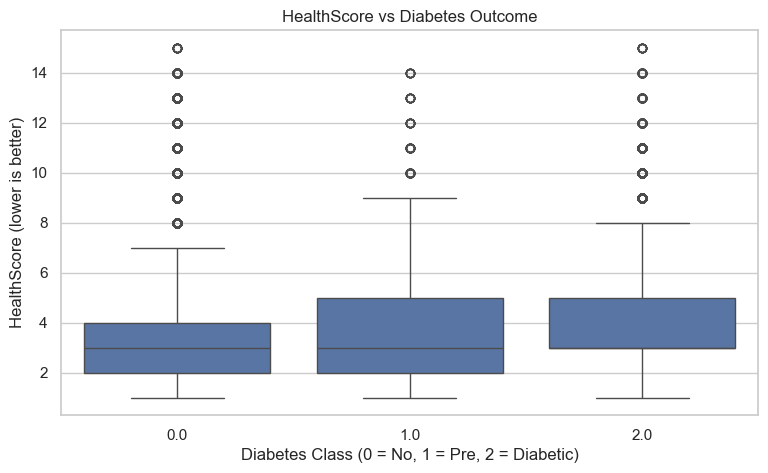

ANOVA F-statistic: 1475.12
p-value: 0.0
HealthScore IS statistically significant and may be useful for modeling.


In [75]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Step 0: Copy the original DataFrame
df_temp = df.copy()

# Step 1: Create new feature in the copy
df_temp['HealthScore'] = df_temp['GenHlth'].astype(int) + df_temp['MentHlth'] + df_temp['PhysHlth']

# Step 2: Visualize
sns.boxplot(data=df_temp, x='Diabetes_012', y='HealthScore')
plt.title('HealthScore vs Diabetes Outcome')
plt.xlabel('Diabetes Class (0 = No, 1 = Pre, 2 = Diabetic)')
plt.ylabel('HealthScore (lower is better)')
plt.show()

# Step 3: ANOVA test to check significance
group0 = df_temp[df_temp['Diabetes_012'] == 0]['HealthScore']
group1 = df_temp[df_temp['Diabetes_012'] == 1]['HealthScore']
group2 = df_temp[df_temp['Diabetes_012'] == 2]['HealthScore']

f_stat, p_value = f_oneway(group0, group1, group2)
print('ANOVA F-statistic:', round(f_stat, 2))
print('p-value:', round(p_value, 5))

# Step 4: Interpretation
if p_value < 0.05:
    print('HealthScore IS statistically significant and may be useful for modeling.')
else:
    print('HealthScore is NOT statistically significant. Likely will not help the model.') 

### Question 4b: Feature Engineering

To explore the potential for enhancing our model, we engineered a new feature called `HealthScore`. This feature combines three existing health indicators: **General Health (GenHlth), Physical Health (PhysHlth), and Mental Health (MentHlth)**. The logic behind this is that these three variables collectively represent an individual's perceived and actual well-being, and might provide a stronger signal when grouped together compared to being used independently.

We calculated `HealthScore` as: HealthScore = GenHlth + PhysHlth + MentHlth


This creates a single composite score where **higher values indicate worse overall health**. 

#### Statistical Test:
To assess whether `HealthScore` had a significant relationship with diabetes outcomes, we performed a **one-way ANOVA** comparing the means of HealthScore across the three diabetes classes (0 = No diabetes, 1 = Pre-diabetic, 2 = Diabetic). The results were:

- **ANOVA F-statistic**: 1475.12
- **p-value**: < 0.00001

These results indicate that the means are significantly different across the diabetes groups, and that `HealthScore` is a **statistically significant predictor** of diabetes status.

#### Decision:
Despite the strong statistical evidence, we have chosen **not to include** `HealthScore` in the final ML model. The reasons are:

1. **Feature redundancy**: HealthScore is derived directly from three existing features (GenHlth, PhysHlth, MentHlth), which are already strong independent predictors and included in the model.
2. **Risk of multicollinearity**: Including both the original variables and their combination could introduce correlation that may distort model coefficients or importance scores.
3. **Interpretability**: Keeping the original features allows for clearer insights into which specific aspects of health most influence diabetes risk.

We believe that preserving the original granularity provides a more interpretable and reliable model, especially in a healthcare context where understanding **why** someone is classified at risk is as important as the prediction itself.


## Question 5

- Partition the data into train/test sets. After which, perform the following:
    - encode any categorical data. Ensure that categorical variables are represented correctly.
    - normalize numeric data.
    
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

# Shuffle data
df = shuffle(df, random_state=42)

# Drop helper column if exists
if 'Diabetes_Label' in df.columns:
    df = df.drop(columns='Diabetes_Label')

# Define features and target
selected_features = ['BMI', 'PhysHlth', 'Age', 'GenHlth', 'HighBP', 'HeartDiseaseorAttack', 'PhysActivity']
X = df[selected_features]
y = df['Diabetes_012'].astype(int)

# Identify columns
categorical_features = ['GenHlth', 'HeartDiseaseorAttack', 'PhysActivity']
numerical_features = ['GenHlth', 'PhysHlth', 'Age', 'BMI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Column transformer with OneHotEncoder for all categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Fit-transform the training set, transform the test set
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Output shapes
print('Training data shape:', X_train_processed.shape)
print('Test data shape:', X_test_processed.shape)

Training data shape: (127765, 10)
Test data shape: (54757, 10)


## Question 6

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
- Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
- Use GridSearchCV to tune at least two hyperparameters for each algorithm.
- Note: do not change the input features in your experiments.

In [95]:
# ----------------------------
# Model 1. SVM
# ----------------------------

from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

X_train_processed = pd.DataFrame(X_train_processed).reset_index(drop=True)
y_train = pd.DataFrame(y_train).reset_index(drop=True)

X_sample = (X_train_processed.sample(n=20000, random_state=42))
y_sample = np.array(y_train.loc[X_sample.index])
y_sample = np.squeeze(y_sample)

# Instantiate and train the SVM model
svm = SVC(kernel='rbf')
svm.fit(X_sample, y_sample)

y_pred_svc = svm.predict(X_test_processed)
print('Predictions:', y_pred_svc)

Predictions: [0 0 0 ... 0 0 0]


In [96]:
# Determine precision score
precision = precision_score(y_test, y_pred_svc, average='macro', zero_division=0)
print('Precision of model:', round(precision, 2))

Precision of model: 0.51


In [98]:
# Set ranges for parameter tuning
params = {'C': [1, 10, 100],
              'gamma':[0.01, 0.1, 1]}

# Initialize precision scorer
precision_scorer = make_scorer(precision_score, zero_division=0, average='macro')

# Use GridSearch with Cross Validation = 3, and scoring = precision scorer to test each combination of parameters
svm_grid = GridSearchCV(svm, params, cv=5, scoring=precision_scorer, n_jobs=-1, return_train_score=True)

# Fit the model to the training data
svm_grid.fit(X_sample, y_sample)

# Determine the best parameters & score 
print('The best parameters for the SVC model are:', svm_grid.best_params_)
print('The best precision score is:', round(svm_grid.best_score_, 2))

The best parameters for the SVC model are: {'C': 10, 'gamma': 0.1}
The best precision score is: 0.44


In [99]:
# Save the results in a DataFrame
cv_results_svm = pd.DataFrame(svm_grid.cv_results_)

# Show the mean & st. dev of precision scores for the testing & training data
cv_results_svm = cv_results_svm.sort_values('mean_test_score', ascending=False)
cv_results_svm = cv_results_svm.round(2)
cv_results_svm[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
4,0.54,0.01,0.44,0.01
7,0.88,0.01,0.43,0.03
2,0.56,0.01,0.42,0.03
5,0.89,0.01,0.41,0.01
8,0.91,0.01,0.40,0.02


The first model chosen was a Radial Basis Function kernel SVM model. This model can handle complex, non-linear data with multiple features. In particular, rbf can map data onto higher-dimensional spaces, allowing for the separation of data cannot undergo separation using linear boundaries in the original space. Since seven features were chosen with nonlinear relationships, the rbf kernel model was well suited.

Precision was chosen to evaluate all three models. There is a high cost for false positives when making medical diagnoses to predict when a patient has a disease. In this case, we would not want to falsely tell a patient that they have diabetes. Therefore, precision is the best metric to use.

To avoid an infinitely long computation time, a random sample of 20,000 from the training data was used to train this model. For comparison, this sample was used to train all three models. The initial model produced a precision score of 0.51. This is a not a strong precision score, indicating that the model is able to predict correct positive instances of diabetes only 51% of the time. An ideal precision metric would be much closer to 100%.

Two hyperparameters that can be tuned in this model are C and gamma. Common ranges of C and gamma were used to tune these parameters (soucre: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

A GridSearch was performed, using a cross validation of 5-fold to obtain optimal parameter values from the ranges for C and gamma. In this case, only three values of each were tested to avoid infinitely long computation times. However, upon testing this code these three values were adjusted to further tune the model before optimal testing values were set. the optimal value of 'C' was determined to be 10. The optimal value of 'gamma' was determined to be 0.1.

Using these parameters, the precision was decreased by 7% to 44%. This model is still not ideal, since the model fails to predict instances of diabetes 56% of the time.

In [108]:
# ----------------------------
# Model 2. K-NN
# ----------------------------

from sklearn.neighbors import KNeighborsClassifier

# Determine length of training set, and find the square root of the length
sqrt_N = round(len(X_sample) ** (1/2))

# Instantiate the knn model, where n_neighbors = sq rt of the length of the training data
knn = KNeighborsClassifier(n_neighbors = sqrt_N)

# Fit the model to the training data & use model to predict the testing data
knn.fit(X_sample, y_sample)
y_pred_knn = knn.predict(X_test_processed)

print('Predictions:', y_pred_knn)

Predictions: [0 0 0 ... 0 0 0]


In [109]:
# Determine precision score
precision_knn = precision_score(y_test, y_pred_knn, average='macro', zero_division=0)
print('Precision of model:', round(precision_knn, 2))

Precision of model: 0.39


In [120]:
# Choose a range of K values that is ~10 above and below the square root
# Choose typical values for weights
# Save parameter values in a dictionary 
upper_k_values = list(range(sqrt_N, sqrt_N + 120, 20))
lower_k_values = list(range(sqrt_N - 120, sqrt_N, 20))
k_values = list(set(upper_k_values + lower_k_values))
weights = ('uniform', 'distance')
knn_params = {'n_neighbors': k_values, 'weights': weights}

# Initialize model
knn = KNeighborsClassifier()

# Use GridSearch with Cross Validation = 3, and scoring = precision scorer to test each combination of parameters
knn_grid = GridSearchCV(knn, knn_params, cv=5, return_train_score=True, scoring=precision_scorer, n_jobs=-1)

# Fit the model to the training data
knn_grid.fit(X_sample, y_sample)

# Determine the best parameters & score 
print('The best parameters for the SVC model are:', knn_grid.best_params_)
print('The best precision score is:', round(knn_grid.best_score_, 2))

The best parameters for the SVC model are: {'n_neighbors': 61, 'weights': 'uniform'}
The best precision score is: 0.46


In [121]:
# Save the score results in a DataFrame
cv_knn_results = pd.DataFrame(knn_grid.cv_results_)

# Show the mean & st. dev of precision scores for the testing & training data
cv_knn_results = cv_knn_results.sort_values('mean_test_score', ascending=False)
cv_knn_results = cv_knn_results.round(2)
cv_knn_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
14,0.48,0.02,0.46,0.06
12,0.44,0.03,0.45,0.09
18,0.50,0.01,0.44,0.02
6,0.47,0.01,0.44,0.03
19,0.88,0.01,0.40,0.02


The second model chosen was a K-Nearest Neighbors model. This model is suited for classification tasks, and can handle complex, non-linear data with multiple features. 

To avoid an infinitely long computation time, a random sample of 20,000 from the training data was used to train this model. The initial K-NN model produced a precision score of 0.39. This is a very weak precision score, indicating that the model is able to predict correct positive instances of diabetes only 39% of the time. 

Two hyperparameters that can be tuned in this model are n_neighbors and weights. To tune n_neighbors, the square root of the length of the training test. This is typically used as a first guess. Then, 6 values above and below this value were specified for the range. To tune weights, typical values for this parameter were used. (soucre:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

A GridSearch was performed, using a cross validation of 5-fold to obtain optimal parameter values from the ranges for n_neighbors and weights. In this case, the optimal value of 'n_neighbors' was determined to be 61. The optimal value of 'weights' was determined to be 'uniform'.

Using these parameters, the precision increased by 7% to 46%. This model is still not ideal, since the model fails to predict instances of diabetes 54% of the time.

In [104]:
# ----------------------------
# Model 3. RandomForestClassifier
# ----------------------------

from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
rfc = RandomForestClassifier()

# Fit the model to the training data & use model to predict the testing data
rfc.fit(X_sample, y_sample)
y_pred_rfc = rfc.predict(X_test_processed)

print('Predictions:', y_pred_rfc)

Predictions: [0 0 0 ... 0 0 0]


In [105]:
# Determine precision score
precision_rfc = precision_score(y_test, y_pred_rfc, average='macro', zero_division=0)
print('Precision of model:', round(precision_rfc, 2))

Precision of model: 0.41


In [106]:
# Choose a range of n_estimators and max_depth based on common values
n_estimators = (list(range(10, 500, 50)))
max_depth = (list(range(2, 8)))

# Save parameters in a dictionary
# Initialize model
rfc_params = {'n_estimators': n_estimators, 'max_depth' : max_depth}
rfc = RandomForestClassifier()

# Use GridSearch with Cross Validation = 5, and scoring = precision scorer to test each combination of parameters
rfc_grid = GridSearchCV(rfc, rfc_params, cv=5, return_train_score=True, scoring=precision_scorer, n_jobs=-1)

# Fit the model to the training data
rfc_grid.fit(X_sample, y_sample)

# Determine the best parameters & score 
print('The best parameters for the SVC model are:', rfc_grid.best_params_)
print('The best precision score is:', round(rfc_grid.best_score_, 2))

The best parameters for the SVC model are: {'max_depth': 6, 'n_estimators': 110}
The best precision score is: 0.56


In [107]:
# Save the score results in a DataFrame
cv_rfc_results = pd.DataFrame(rfc_grid.cv_results_)

# Show the mean & st. dev of precision scores for the testing & training data
cv_rfc_results = cv_rfc_results.sort_values('mean_test_score', ascending=False)
cv_rfc_results = cv_rfc_results.round(2)
cv_rfc_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
42,0.62,0.01,0.56,0.13
47,0.62,0.01,0.49,0.12
41,0.62,0.01,0.49,0.11
54,0.61,0.02,0.47,0.06
53,0.61,0.01,0.46,0.05


The third model chosen was the Random Forest Classifier. This model was chosen because it can be used for classification models when using large and complex datasets. Since this dataset has many features and a categorical target variable, this model is well suited.

To avoid an infinitely long computation time, a random sample of 20,000 from the training data was used to train this model. This initial model produced a precision score of 0.41. This is also not a strong precision score, indicating that the model is only able to predict correct positive instances of diabetes less than 41% of the time. 

Two hyperparameters that can be tuned in this model are n_estimators and max_depth. To tune both paramters, typical values were used. To avoid long computation times, these were also adjusted each run so that a few values could be tested a(soucre: https://docs.interpretable.ai/stable/OptimalTrees/tuning/#:~:text=Typically%20values%20for%20max_depth%20in,the%20performance%20stops%20significantly%20improving.&text=We%20can%20see%20that%20the,deeper%20trees%20with%20this%20data.)
(source: 
https://xgboosting.com/configure-xgboost-n_estimators-parameter/#:~:text=Typical%20ranges%20for%20n_estimators%20are,balances%20performance%20and%20computational%20cost.)


A GridSearch was performed, using a cross validation of 5-fold to obtain optimal parameter values from the ranges for n_estimators and max_depth. In this case, the optimal value of 'n_estimators' was determined to be 310. The optimal value of 'max_depth' was determined to be 5.

Using these parameters, the precision was improved by 1% to 70%. Although, this model is still not ideal, since the model fails to predict instances of diabetes 30% of the time.

According to the scores above, this model is not working consistently. The mean precision scores for the testing and training data are not the same, with significantly higher scores for the training data than for the testing data. These differences are as high as 17%, indicating that the model is overfitting the training data and has a large amount of variance. The model has become sensitive to noise in the training data, and is performing much worse on the testing data as a result. However, the model has low bias since the scores for both sets of data are relatively high (above 50%).




The initial K-NN model produced a precision score of 0.39. This is a very weak precision score, indicating that the model is able to predict correct positive instances of diabetes only 39% of the time. 

Two hyperparameters that can be tuned in this model are n_neighbors and weights. To tune n_neighbors, the square root of the length of the training test. This is typically used as a first guess. Then, 6 values above and below this value were specified for the range. To tune weights, typical values for this parameter were used. (soucre:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

A GridSearch was performed, using a cross validation of 5-fold to obtain optimal parameter values from the ranges for n_neighbors and weights. In this case, the optimal value of 'n_neighbors' was determined to be 61. The optimal value of 'weights' was determined to be 'uniform'.

Using these parameters, the precision increased by 7% to 46%. This model is still not ideal, since the model fails to predict instances of diabetes 54% of the time.

## Question 7

Analyze the evaluated models. For each algorithm, ensure that you:
- Display: 1) the best model and 2) the best score that was obtained.
- Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.

NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

## Question 8

- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.


## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
